<a href="https://colab.research.google.com/github/JakubPac/kurs_ml/blob/main/regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
np.random.seed(42)

In [5]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 30.0, random_state = 42)

print(data.shape)
print(target.shape)

(100, 1)
(100,)


In [6]:
data[:5]

array([[ 0.93128012],
       [ 0.08704707],
       [-1.05771093],
       [ 0.31424733],
       [-0.47917424]])

In [7]:
target[:5]

array([ 74.59447456, -37.46269129, -16.45513974,   5.34617009,
       -13.21261185])

[]

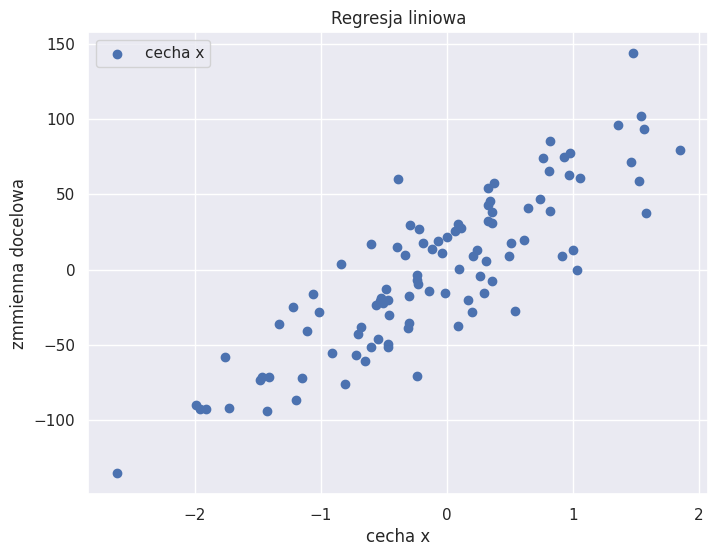

In [8]:
plt.figure(figsize = (8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmmienna docelowa')
plt.scatter(data, target, label = 'cecha x')
plt.legend()
plt.plot()

Regresja liniowa przy uzycie sklearn

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

LinearRegression()

In [10]:
regressor.score(data, target)

0.7426670084336404

In [15]:
y_pred = regressor.predict(data)
np.set_printoptions(precision = 4)
y_pred

array([ 4.9900e+01,  7.8328e+00, -4.9210e+01,  1.9154e+01, -2.0382e+01,
        3.5769e+01, -1.9596e+01,  3.0531e+01,  3.3975e+01,  5.3501e+01,
        4.4450e+01,  8.0135e+01,  4.0293e+01, -7.4508e+00, -3.6791e+01,
        8.0677e+00, -9.4154e+01,  2.9071e+01,  5.4869e+01, -1.2704e+02,
        2.8246e+01,  8.3327e+00, -1.9712e+01,  4.9109e+01,  8.1460e+01,
        7.6528e+01, -2.6434e+01,  1.7102e+00, -2.6487e+01, -5.6111e+01,
        2.1290e+01,  2.2216e+01,  1.6504e+01, -2.2902e+01, -4.1751e+01,
        1.3305e+01, -1.1404e+01,  2.1515e+01,  4.4482e+01, -1.1040e+01,
        2.1503e+01, -3.0235e+01,  7.9387e+01, -2.2330e+01, -8.1724e+00,
       -1.6043e+01, -1.1508e+01, -2.8651e+01,  1.9877e+01,  1.3903e+01,
       -1.2832e+01,  3.7501e+00, -8.1715e+00,  7.7138e+01, -1.5693e+01,
        2.0618e+01,  2.0002e+01, -5.7559e+00, -8.1940e+00, -9.5544e+01,
        1.9644e+01, -7.7549e+00, -5.1633e+01, -3.1487e+01, -6.9431e+01,
        5.1762e+01, -8.2456e+01, -9.1842e+01, -2.4523e+01,  4.17

[]

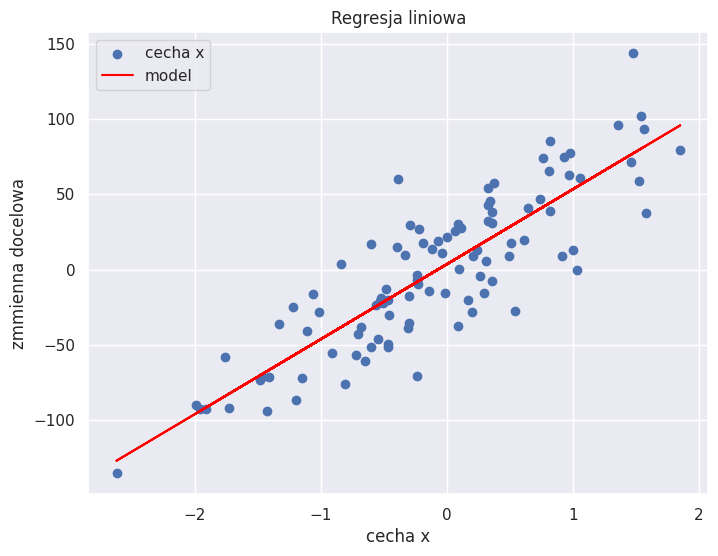

In [16]:
plt.figure(figsize = (8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmmienna docelowa')
plt.scatter(data, target, label = 'cecha x')
plt.plot(data, y_pred, color = 'red', label = 'model')
plt.legend()
plt.plot()

Wspolczynnik R^2

In [17]:
u = ((target - y_pred) ** 2).sum() # u
v = ((target - y_pred.mean())**2).sum() # v
1 - u / v

np.float64(0.7426670084336404)

In [18]:
regressor.score(data, target)

0.7426670084336404

In [19]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_fit_request',
 'set_params',
 'set_score_request',
 'singular_']

In [20]:
regressor.coef_

array([49.8293])

In [21]:
regressor.intercept_

np.float64(3.4953459615809184)

[]

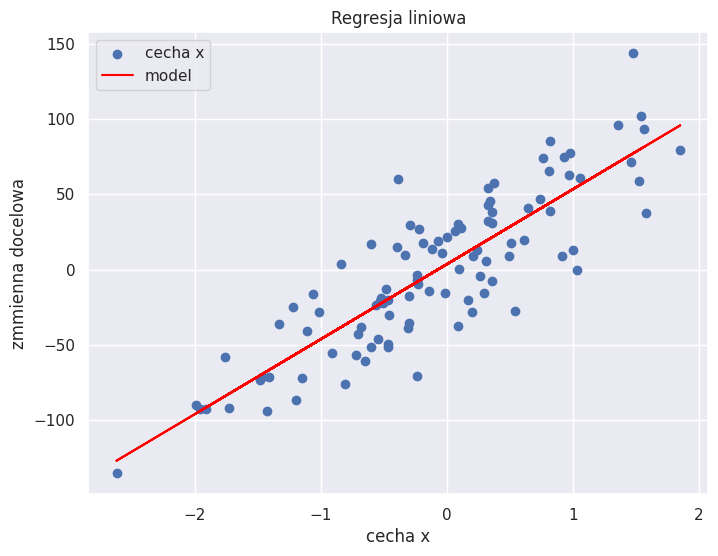

In [23]:
plt.figure(figsize = (8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmmienna docelowa')
plt.scatter(data, target, label = 'cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color = 'red', label = 'model')
plt.legend()
plt.plot()

Regresja z podziałem

In [24]:
data , target = make_regression(n_samples = 1000, n_features = 1, n_targets = 1, noise = 15.0, random_state = 42)

print(data.shape)
print(target.shape)

(1000, 1)
(1000,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 1)
(250, 1)
(750,)
(250,)


[]

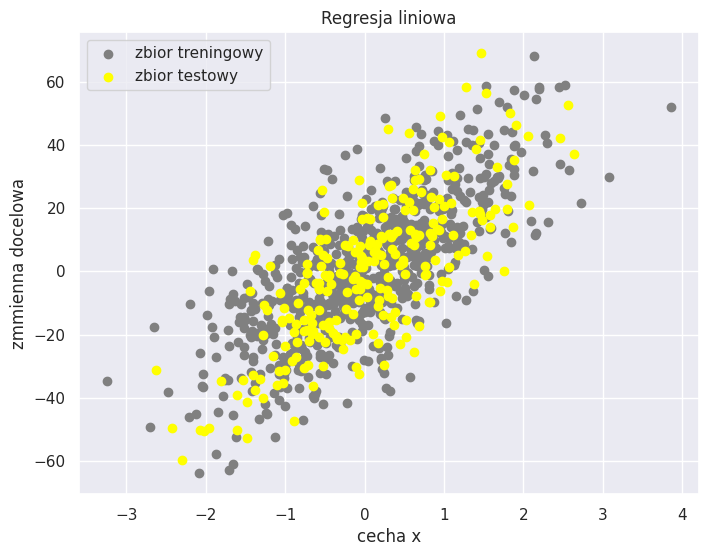

In [30]:
plt.figure(figsize = (8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmmienna docelowa')
plt.scatter(X_train, y_train, label = 'zbior treningowy', color = 'gray')
plt.scatter(X_test, y_test, label = 'zbior testowy', color = 'yellow')
plt.legend()
plt.plot()

In [32]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
regressor.score(X_train, y_train)

0.5408930484049115

In [34]:
regressor.score(X_test, y_test)

0.5502380687566506

[]

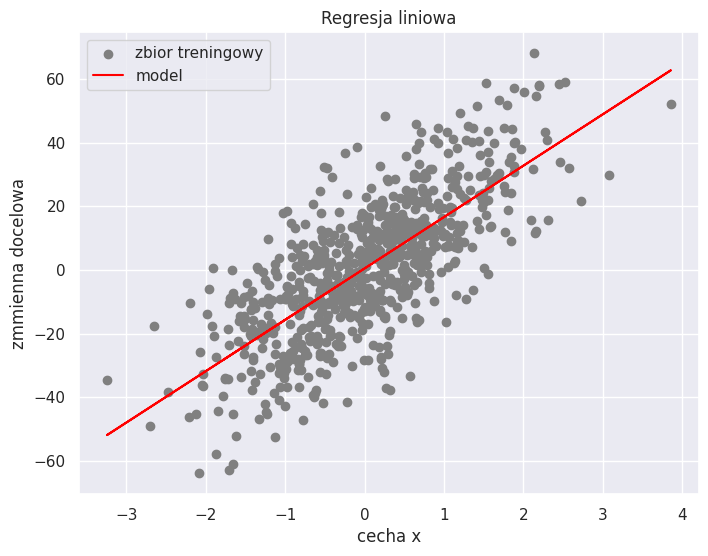

In [35]:
plt.figure(figsize = (8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmmienna docelowa')
plt.scatter(X_train, y_train, label = 'zbior treningowy', color = 'gray')
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color = 'red', label = 'model')
plt.legend()
plt.plot()

[]

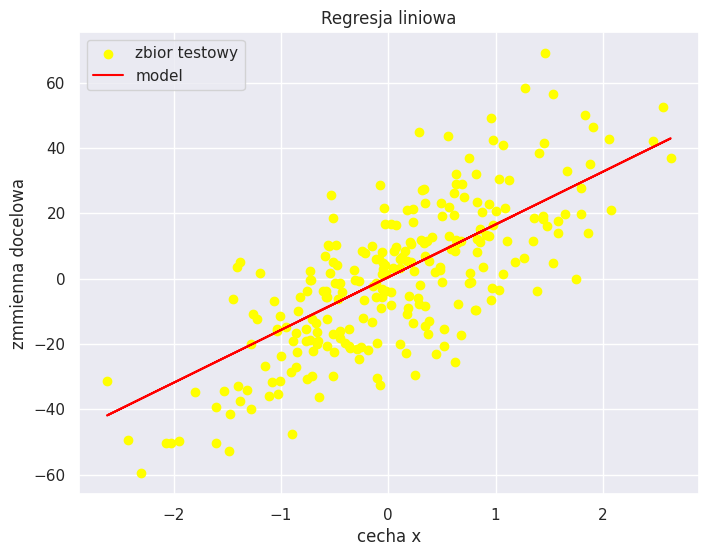

In [36]:
plt.figure(figsize = (8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmmienna docelowa')
plt.scatter(X_test, y_test, label = 'zbior testowy', color = 'yellow')
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, color = 'red', label = 'model')
plt.legend()
plt.plot()

Predykcja na podstawie modelu

In [37]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data = {'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,-5.602081,-12.767885
1,6.816964,-9.120373
2,-0.869617,8.604327
3,-0.390419,-4.546477
4,24.961278,11.889108


In [39]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,-5.602081,-12.767885,7.165805
1,6.816964,-9.120373,15.937337
2,-0.869617,8.604327,-9.473944
3,-0.390419,-4.546477,4.156058
4,24.961278,11.889108,13.072170


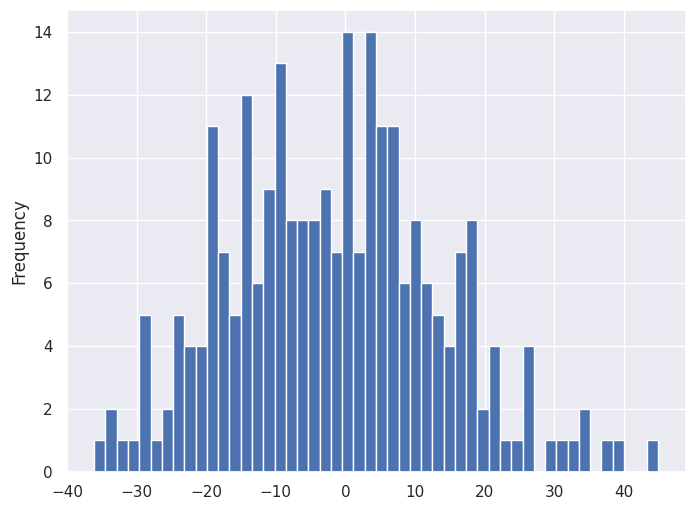

In [40]:
_ = predictions['error'].plot(kind = 'hist', bins = 50, figsize = (8,6))